In [80]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

# other necessary utilities
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# importing aliases for Torch
import torch as t
from torch import nn
from torch.nn import functional, Sequential
from torch.utils.data import TensorDataset, DataLoader
import torch.optim as optim

In [ ]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()
# dataset.info()

--2025-08-12 22:06:26--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.3.33, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0.007s  

2025-08-12 22:06:26 (7.16 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


## Quick info and preprocessing on the categoricals
### Feature Engineering
- in col 'sex' change male to 1, female to 0
- in col 'smoker' change yes to 1 and no 0
- perform numeric encoding to region col

### Split the Dataset

### Scale the BMI and AGE feature

In [ ]:
# for col in dataset.select_dtypes(exclude=['number']).columns:
#   print(f'Column "{col}" has -> {dataset[col].nunique()} uniques:\n{dataset[col].value_counts()}')

dataset['sex'] = dataset['sex'].apply(lambda x: float(x == 'male'))
# or dataset['sex'] = (dataset['sex'] == 'male').astype(float)

dataset['smoker'] = dataset['smoker'].apply(lambda x: float(x == 'yes'))

dataset = pd.get_dummies(dataset, columns=["region"], drop_first=False).astype(float)

In [84]:
# # dataset.head()
X = dataset.copy()
y = X.pop('expenses')
train_dataset, test_dataset, train_labels, test_labels = train_test_split(X, y, train_size=0.8, random_state=42)

print(f'Data shape: {dataset.shape}\t train shape: {train_dataset.shape}\t test shape: {test_dataset.shape}')

Data shape: (1338, 10)	 train shape: (1070, 9)	 test shape: (268, 9)


In [85]:
scaler = StandardScaler()
train_dataset = scaler.fit_transform(train_dataset)
test_dataset = scaler.transform(test_dataset)

In [ ]:
print(type(train_labels))

<class 'pandas.core.series.Series'>


## PYTORCH IMPLEMENTATION
* Uncomment all

In [ ]:
# train_df = TensorDataset(
#     t.tensor(train_dataset, dtype=t.float32),
#     t.tensor(train_labels.to_numpy().reshape(-1, 1), dtype=t.float32)
# )
# test_df = TensorDataset(
#     t.tensor(test_dataset, dtype=t.float32),
#     t.tensor(test_labels.to_numpy().reshape(-1, 1), dtype=t.float32)
# )

# model = nn.Sequential(
#     nn.Linear(9, 32),
#     nn.LeakyReLU(),
#     nn.Linear(32, 48),
#     nn.LeakyReLU(),
#     nn.Linear(48, 16),
#     nn.LeakyReLU(),
#     nn.Linear(16, 1),
# )

# trainloader = DataLoader(train_df, batch_size=500, shuffle=True)
# testloader = DataLoader(test_df, batch_size=500, shuffle=True)

# criterion = nn.MSELoss()
# optimizer = optim.AdamW(model.parameters(), lr=1e-3, weight_decay=1e-4)

# # start training loop
# num_epochs = 300

# for epoch in range(num_epochs):
#   # start training loop
#   #initialize loss
#   train_loss = 0.0
#   model.train()
#   for data in trainloader:

#     optimizer.zero_grad()
#     features, target = data
#     #forward pass
#     outputs = model(features)

#     # backpropagation
#     # calc & compute loss
#     loss = criterion(outputs, target)
#     loss.backward()
#     # update model parameters
#     optimizer.step()

#     train_loss += loss.item()
#   epoch_loss = train_loss/len(trainloader.dataset)
#   print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {epoch_loss:.4f}")

#   # start testing loop
#   # initialize loss
#   val_loss = 0.0
#   model.eval()
#   with t.no_grad():
#     for data in testloader:

#       features, target = data
#       #forward pass
#       outputs = model(features)

#       # calc & compute loss
#       loss = criterion(outputs, target)

#       val_loss += loss.item()
#     epoch_loss = val_loss/len(testloader.dataset)
#     print(f"Epoch {epoch+1}/{num_epochs}, val Loss: {epoch_loss:.4f}")




Epoch 1/300, Train Loss: 965477.8916
Epoch 1/300, val Loss: 1206806.4478
Epoch 2/300, Train Loss: 935917.2785
Epoch 2/300, val Loss: 1206802.9851
Epoch 3/300, Train Loss: 879142.8187
Epoch 3/300, val Loss: 1206798.9254
Epoch 4/300, Train Loss: 953575.9551
Epoch 4/300, val Loss: 1206794.6269
Epoch 5/300, Train Loss: 898507.2449
Epoch 5/300, val Loss: 1206789.7313
Epoch 6/300, Train Loss: 899111.5664
Epoch 6/300, val Loss: 1206783.8806
Epoch 7/300, Train Loss: 882829.8168
Epoch 7/300, val Loss: 1206776.8358
Epoch 8/300, Train Loss: 903686.9682
Epoch 8/300, val Loss: 1206768.4776
Epoch 9/300, Train Loss: 1040616.8822
Epoch 9/300, val Loss: 1206758.4478
Epoch 10/300, Train Loss: 874170.4374
Epoch 10/300, val Loss: 1206746.5075
Epoch 11/300, Train Loss: 934969.9290
Epoch 11/300, val Loss: 1206731.9403
Epoch 12/300, Train Loss: 941256.1346
Epoch 12/300, val Loss: 1206714.6269
Epoch 13/300, Train Loss: 925587.9776
Epoch 13/300, val Loss: 1206693.8507
Epoch 14/300, Train Loss: 933655.1477
Epoc

## TENSORFLOW/KERAS IMPLEMENTATION

In [81]:
model = keras.models.Sequential([
    layers.Dense(32, input_shape=(9,)),
    layers.LeakyReLU(alpha=0.01),
    layers.Dense(48),
    layers.LeakyReLU(alpha=0.01),
    layers.Dense(16),
    layers.LeakyReLU(alpha=0.01),
    layers.Dense(1)
])

model.compile( keras.optimizers.Adam(learning_rate=0.01),
              loss='mse',
              metrics=['mae', 'mse'])

callbacks = [
    EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True),
]

model.fit(train_dataset, train_labels.to_numpy().reshape(-1, 1),\
          epochs=300, batch_size=500, validation_split=0.2, callbacks=callbacks)

Epoch 1/300


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 264ms/step - loss: 327081280.0000 - mae: 13573.5039 - mse: 327081280.0000 - val_loss: 310346304.0000 - val_mae: 12654.7881 - val_mse: 310346304.0000
Epoch 2/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 321175328.0000 - mae: 13406.8867 - mse: 321175328.0000 - val_loss: 310314784.0000 - val_mae: 12653.6504 - val_mse: 310314784.0000
Epoch 3/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 322316224.0000 - mae: 13411.8594 - mse: 322316224.0000 - val_loss: 310262080.0000 - val_mae: 12651.7773 - val_mse: 310262080.0000
Epoch 4/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 327897984.0000 - mae: 13545.3682 - mse: 327897984.0000 - val_loss: 310178016.0000 - val_mae: 12648.8203 - val_mse: 310178016.0000
Epoch 5/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 333281792.0000 - mae: 13706.2236 - mse: 333281792.0000 - val_loss: 310048512.0000 - val_mae: 12644.3154 - val_mse: 310048512.0000
Epoch 6/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 326013088.000

In [86]:
# preparing labels shape for scoring
test_labels = test_labels.to_numpy().reshape(-1, 1)

9/9 - 0s - 10ms/step - loss: 22999220.0000 - mae: 3044.8718 - mse: 22999220.0000
Testing set Mean Abs Error: 3044.87 expenses
You passed the challenge. Great job!
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


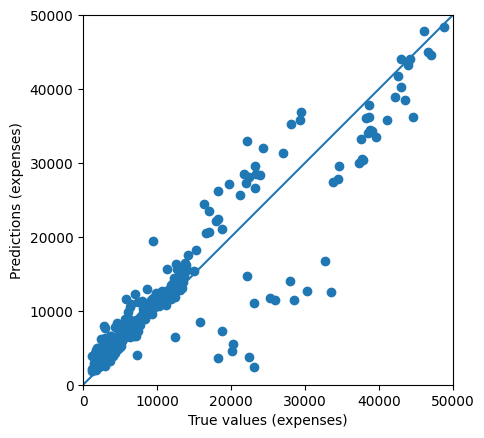

In [87]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
